In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()
df=df.drop_duplicates()

In [4]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker']=  df['smoker'].map({'yes': 0, 'no': 1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [5]:
df.region=df['region'].map({'northwest': 1, 'southwest': 2,'northeast': 3,'southeast': 4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,4,1725.55230
2,28,0,33.000,3,1,4,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,4,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


In [6]:
def categorize_bmi(bmi):
    if bmi < 18:
        return 'Underweight'
    elif 18 <= bmi < 26:
        return 'Normal weight'
    elif 26 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,0,2,16884.92400,Overweight
1,18,0,33.770,1,1,4,1725.55230,Obesity
2,28,0,33.000,3,1,4,4449.46200,Obesity
3,33,0,22.705,0,1,1,21984.47061,Normal weight
4,32,0,28.880,0,1,1,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830,Obesity
1334,18,1,31.920,0,1,3,2205.98080,Obesity
1335,18,1,36.850,0,1,4,1629.83350,Obesity
1336,21,1,25.800,0,1,2,2007.94500,Normal weight


In [7]:
x=df.iloc[:,:-2]
y=df['charges']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

80.48346102318081

In [10]:
# lr.predict(x_test)

In [11]:
lr.predict([[34,0,26,3,0,2]])

array([29806.43081599])

In [12]:
df['bmi_category'] = df['bmi_category'].map({'Underweight': 1, 'Normal weight': 2, 'Overweight': 3, 'Obesity': 4})
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,0,2,16884.92400,3
1,18,0,33.770,1,1,4,1725.55230,4
2,28,0,33.000,3,1,4,4449.46200,4
3,33,0,22.705,0,1,1,21984.47061,2
4,32,0,28.880,0,1,1,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830,4
1334,18,1,31.920,0,1,3,2205.98080,4
1335,18,1,36.850,0,1,4,1629.83350,4
1336,21,1,25.800,0,1,2,2007.94500,2


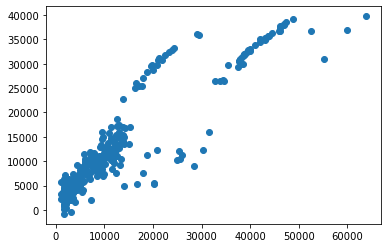

In [13]:
plt.scatter(y_test,lr.predict(x_test))

In [14]:
x=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'bmi_category']]
y=df['charges']
test_size=[0.1,0.2,0.3,0.4]
random_states=range(1,50)
r=[]
m=[]
for i in test_size:
    for j in random_states:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred=lr.predict(x_test)
        r.append(r2_score(y_test,y_pred))
        m.append(mean_squared_error(y_test,y_pred))
        
max(r),min(m)


(0.8493617211502401, 20347128.13232117)

In [15]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
x=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'bmi_category']]
y=df['charges']
test_size=[0.1,0.2,0.3,0.4]
random_states=range(1,50)
best_r2=0
best_mse=math.inf
best_r2_params={}
best_mse_params={}
for i in test_size:
    for j in random_states:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred=lr.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_r2_params = {'test_size':i, 'random_state':j}
        if mse < best_mse:
            best_mse = mse
            best_mse_params = {'test_size':i, 'random_state':j}

print('best_r2_params',best_r2_params)
print('best r2',best_r2)
print('best_mse_params',best_mse_params)
print('best mse',best_mse)



best_r2_params {'test_size': 0.1, 'random_state': 11}
best r2 0.8493617211502401
best_mse_params {'test_size': 0.1, 'random_state': 11}
best mse 20347128.13232117


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category'],
      dtype='object')

In [18]:
df = pd.read_csv('Datasets/Ice_cream selling data.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [34]:
from sklearn.preprocessing import PolynomialFeatures
x=df[['Temperature (°C)']]
y=df[['Ice Cream Sales (units)']]
best_r2=0
best_degree={}
for i in range(1,6):
        pr=PolynomialFeatures(degree=i)
        a=pr.fit_transform(x)
        b=pr.fit_transform(x)
        lr=LinearRegression()
        lr.fit(a,y)
        y_pred=lr.predict(b)
        r2 = r2_score(y, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_degree = {'best_degree':i}
print('best_r2',r2)
print(best_degree)

best_r2 0.945283262189464
{'best_degree': 5}


In [28]:
x = df[['Temperature (°C)']]
y = df[['Ice Cream Sales (units)']]
for i in range(1,6):

    poly = PolynomialFeatures(degree=i)
    x_poly_train = poly.fit_transform(x)
    x_poly_test = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly_train,y)

    y_pred = model.predict(x_poly_test)
    print(mean_squared_error(y,y_pred))
    print(r2_score(y,y_pred))


142.83040442368952
0.03068953641154748
10.003220594982492
0.9321137090423876
9.327243445671261
0.9367011897445384
8.274534314947289
0.9438453407370606
8.062652869021331
0.945283262189464


In [36]:
df = pd.read_csv('Datasets/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [39]:
x=df.iloc[:,:-1]
y=df['booking_status']
oe=OneHotEncoder()
oe.fit(x)

OneHotEncoder()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

best_r2=0
best_degree={}
for i in range(1,6):
        pr=PolynomialFeatures(degree=i)
        a=pr.fit_transform(x)
        b=pr.fit_transform(x)
        lr=LinearRegression()
        lr.fit(a,y)
        y_pred=lr.predict(b)
        r2 = r2_score(y, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_degree = {'best_degree':i}
print('best_r2',r2)
print(best_degree)

In [8]:
# Printing the word "FUDDI" horizontally with proper gaps between letters

print("| | | | |    |            |     | | | | | |     | | | | | |     | |   ")
print("| |          |            |     |          |    |          |    | |  ")
print("| | | |      |            |     |          |    |          |    | |")
print("| |          |            |     |          |    |          |    | | ")
print("| |          |            |     |          |    |          |    | | ")
print("| |          | | | | | | ||     | | | | | |     | | | | | |     | | ")


| | | | |    |            |     | | | | | |     | | | | | |     | |   
| |          |            |     |          |    |          |    | |  
| | | |      |            |     |          |    |          |    | |
| |          |            |     |          |    |          |    | | 
| |          |            |     |          |    |          |    | | 
| |          | | | | | | ||     | | | | | |     | | | | | |     | | 


In [11]:
print("| | | | | |")
print("| |")
print("| |")
print("| | | | |")
print("      | |")
print("      | |")
print("| | | | |")


| | | | | |
| |
| |
| | | | |
      | |
      | |
| | | | |
